In [1]:
#Import libraries

import numpy as np
import pandas as pd
from hmmlearn import hmm
import warnings
from constants import *
import matplotlib.pyplot as plt
import collections, operator
warnings.filterwarnings("ignore")

In [31]:
X1 = [[0.5], [1.0], [-1.0]]
X2 = [[9.4], [4.2], [0.5]]
X = np.concatenate([X1, X2])
lengths = [len(X1), len(X2)]
model = hmm.GaussianHMM(n_components=2).fit(X, lengths) 
Z = model.predict(X)
print(Z)

[1 1 1 1 1 0]


In [32]:
print(model.transmat_)
print("Means and vars of each hidden state")
for i in range(model.n_components):
    print("Hidden state {0}".format(i+1))
    print("mean = ", model.means_[i])
    print("var = ", np.diag(model.covars_[i]))
    print()

[[  1.00000000e+00   1.33370284e-17]
 [  4.92038779e-01   5.07961221e-01]]
Means and vars of each hidden state
Hidden state 1
mean =  [ 0.24794798]
var =  [ 0.56908843]

Hidden state 2
mean =  [ 6.70010631]
var =  [ 7.27674441]



In [6]:
#Dataset

df_main = pd.read_csv('Data/cleaned.txt', sep=",")
print("Dataset size is",len(df_main))
print(df_main.head(5))
X = df_main.values

Dataset size is 11087
     cdRPKM0    cdRPKM1    cdRPKM2
0   8.539825   5.879642   5.990043
1  13.837680   4.128452   6.882499
2  39.456786  62.505536  84.519655
3   2.104887   3.488833   2.908098
4  10.010800  17.066902   9.484017


In [3]:
print(X.shape)
print(X[0])

(11087, 3)
[ 8.53982524  5.87964162  5.99004266]


In [12]:
#Fit HMM

remodel = hmm.GaussianHMM(n_components=3,n_iter=100) #consider Gaussian Emissions
remodel.fit(X) #get sequence of states using Viterbi
Z = remodel.predict(X)

In [30]:
print("Hidden states samples")
counts = {}
for idx,i in enumerate(Z):
    if(idx%1000==0):
        print("State of", idx, " is ",i)
    if(i not in counts):
        counts[i]=1
    else:
        counts[i]+=1
print("Counts of each HMM are\n",counts)

Hidden states samples
State of 0  is  0
State of 1000  is  2
State of 2000  is  1
State of 3000  is  0
State of 4000  is  1
State of 5000  is  0
State of 6000  is  2
State of 7000  is  1
State of 8000  is  0
State of 9000  is  1
State of 10000  is  1
State of 11000  is  0
Counts of each HMM are
 {0: 5983, 1: 4151, 2: 953}


In [31]:
print("Transition matrix")
print(remodel.transmat_)
print()

Transition matrix
[[ 0.54088498  0.3791243   0.07999072]
 [ 0.5353866   0.37579376  0.08881964]
 [ 0.52178083  0.35773401  0.12048517]]



In [32]:
print("Means and vars of each hidden state")
for i in range(remodel.n_components):
    print("Hidden state {0}".format(i+1))
    print("mean = ", remodel.means_[i])
    print("var = ", np.diag(remodel.covars_[i]))
    print()

Means and vars of each hidden state
Hidden state 1
mean =  [ 6.1464168   6.30849677  7.09616838]
var =  [ 18.49816135  19.10115191  22.95627763]

Hidden state 2
mean =  [ 29.51966805  32.28184107  32.04601375]
var =  [ 266.4165085   303.65605753  271.48850803]

Hidden state 3
mean =  [ 205.10211459  224.31116124  182.87103404]
var =  [ 81402.08106441  90082.84812639  44742.93741073]



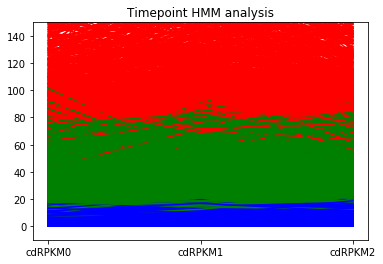

In [46]:
fig = plt.subplot(111)
colors = ['b','g','r','c','m','y','k']
var_plot_list = CDRPKM_LIST
for i in range(len(df_main)):
    fig.plot(var_plot_list, df_main.iloc[i], color = colors[Z[i]])

plt.title("Timepoint HMM analysis")
plt.ylim(-10, 150)
plt.show()

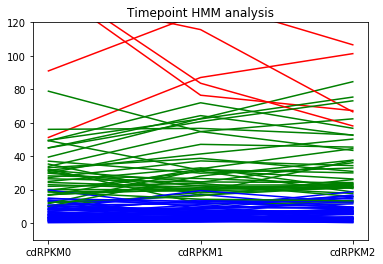

In [58]:
fig = plt.subplot(111)
for i in range(100):
    fig.plot(var_plot_list, df_main.iloc[i], color = colors[Z[i]])
plt.title("Timepoint HMM analysis")
plt.ylim(-10, 120)
plt.show()

In [60]:
fitted_clusters = []
# Append empty clusters
for i in range(0,3):
    fitted_clusters.append([])
    
for idx, i in enumerate(Z):
    fitted_clusters[Z[idx]].append(list(X[idx]))
    
for i in range(0,3):
    dataframe = pd.DataFrame(np.array(fitted_clusters[i]), columns = list("012"))
    print("Descriptive statistics for cluster", i+1, "is")
    print(dataframe.describe())
    print("*************************************************************************")
    print("*************************************************************************")
    print("*************************************************************************")

Descriptive statistics for cluster 1 is
                 0            1            2
count  5983.000000  5983.000000  5983.000000
mean      6.139204     6.310284     7.087727
std       4.257891     4.336890     4.745488
min       0.074259     0.073034     0.074316
25%       2.593439     2.677915     3.147669
50%       5.395196     5.470832     6.376432
75%       9.020419     9.347439    10.203773
max      21.829329    21.232039    22.683164
*************************************************************************
*************************************************************************
*************************************************************************
Descriptive statistics for cluster 2 is
                 0            1            2
count  4151.000000  4151.000000  4151.000000
mean     29.732860    32.484161    32.274286
std      16.295154    17.341424    16.429757
min       0.928242     1.893303     1.757234
25%      17.847245    19.295431    20.120568
50%      25.437777    2

In [65]:
#Generate random samples from the model
list(remodel.sample(n_samples=10, random_state=None))

[array([[   6.07583823,    0.6144985 ,    9.69086475],
        [  30.83326157,   57.33302404,   44.33700832],
        [   1.43777638,    3.07779711,    3.15290582],
        [  -4.60388878,   64.77630711,   35.49266281],
        [  14.64514604,   41.24104485,   44.33533079],
        [  49.24760319, -512.21702001,  174.3071673 ],
        [  19.25435706,   10.05750757,   29.4973983 ],
        [   0.79118698,   12.46404802,    4.52730472],
        [  61.85498771,   66.03762055,   25.94996527],
        [   6.21182751,    4.51970853,   10.38949207]]),
 array([0, 1, 0, 1, 1, 2, 1, 0, 1, 0])]

In [64]:
#Calculate log probability of random sequences and their likelihood of belonging to a state
remodel.score_samples([[  7.66420946,   2.84622362,   9.44477683],
        [ 20.78989248,  11.59261326,  36.42768637],
        [  5.1848152 ,   7.91870231,   5.09636083],
        [  2.33447871,   3.57667201,   2.21577216],
        [  2.33407443,   7.14154673,  10.94863449],
        [ 17.14206506,  45.22425666,  39.39483097],
        [ 83.16641382,  20.48690728,  56.34215294],
        [  4.34020468,   0.50674696,   5.15605215],
        [  2.1013768 ,   5.3309819 ,   2.21939971],
        [ 20.17092938,  18.68619509,  13.84055864]])

(-109.21868966858757,
 array([[  1.00000000e+000,   4.58994621e-208,   0.00000000e+000],
        [  1.93162456e-009,   9.99936071e-001,   6.39272840e-005],
        [  9.99480280e-001,   5.19316965e-004,   4.03494849e-007],
        [  9.99495500e-001,   5.03617168e-004,   8.82792001e-007],
        [  9.98918934e-001,   1.08044554e-003,   6.20733470e-007],
        [  4.54237042e-027,   9.99945366e-001,   5.46336293e-005],
        [  8.27623408e-091,   9.71005091e-001,   2.89949090e-002],
        [  9.99417682e-001,   5.81362211e-004,   9.55969962e-007],
        [  9.99486950e-001,   5.12281992e-004,   7.67632573e-007],
        [  7.16365313e-003,   9.92762100e-001,   7.42468046e-005]]))